# Decision Trees on Telco-Customer-Churn Data.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')


#### Use pandas pd.read_csv method to read in WA_Fn-UseC_-Telco-Customer-Churn.csv data and call it data. 

In [98]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv').dropna()

* We use the dataframe.head() function to take a look at the first 5 rows of our data.

In [99]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Lets use the Pandas dataframe.info() function to get a concise summary of the dataframe. 

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Use the df.isnull().sum() function to get the number of null values in each of the columns should any exist.

In [102]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Lets use the df.column.value_counts() method to get the number of churned and no churn customers  

In [103]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From the above output, lets plot this data in a donut chart to better visualize this.

In [104]:
import plotly.graph_objects as go

labels = ['No_Churn', 'Churn']
values = [5174, 1869]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

From the df.head() function that we used earlier, we were able to determine that the dataframe contains a mixture of categorical and numercal data. This means that we have to change this so we can plot it. Below we use the df.column.replace() function to change the categorical data to numeric.

In [105]:
# Use df.replace()function on the column to change the variable to an interger.
data['Partner'].replace(['Yes','No'], [1,0],inplace=True)

In [106]:
# Use df.replace()function on the  column to change the variable to an interger.
data['gender'].replace(['Male','Female'], [0,1],inplace=True)

In [107]:
# Use df.replace()function on the  column to change the variable to an interger.
data['InternetService'].replace(['No','DSL','Fiber optic'], [0,1,2],inplace=True)

In [108]:
# Use df.replace()function on the column to change the variable to an interger.
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [109]:
# Use df.replace()function on the column to change the variable to an interger.
data['PhoneService'].replace(['Yes','No'], [1,0],inplace=True)

In [110]:
# Use df.replace()function on the to change the variable to an interger.
data['Dependents'].replace(['Yes','No'], [1,0],inplace=True)

In [111]:
# Use df.replace()function on the column to change the variable to an interger.
data['DeviceProtection'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [112]:
# Use df.replace()function on the column to change the variable to an interger.
data['MultipleLines'].replace(['No phone service','No', 'Yes'], [0,0,1],inplace=True)

In [113]:
# Use df.replace()function on the column to change the variable to an interger.
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'], [0,1,2],inplace=True)

In [114]:
# Use df.replace()function on the column to change the variable to an interger.
data['StreamingTV'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [115]:
# Use df.replace()function on the column to change the variable to an interger.
data['TechSupport'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [116]:
# Use df.replace()function on the column to change the variable to an interger.
data['OnlineBackup'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [117]:
# Use df.replace()function on the column to change the variable to an interger.
data['OnlineSecurity'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [118]:
# Use df.replace()function on the column to change the variable to an interger.
data['StreamingMovies'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [119]:
# Use df.replace()function on the column to change the variable to an interger.
data['PaperlessBilling'].replace(['Yes','No'], [1,0],inplace=True)

In [120]:
# Use df.replace()function on the column to change the variable to an interger.
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'], [0,1,2,3],inplace=True)

In [121]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


### Split your data into train and test sets. 

In [122]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import datasets, linear_model

* Drop customerID and Totalcharges columns.

In [123]:
data1 = data.drop(['customerID'], axis=1)

In [124]:
data2 = data1.drop(['TotalCharges'], axis=1)

* Define X and y vars.

In [125]:
y = data2['Churn']
X = data2.drop(['Churn'], axis=1)

* create training and testing vars

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) # 70% training and 30% test
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(4930, 18) (4930,)
(2113, 18) (2113,)


### Get basic descriptive statistics for the training data. 

In [127]:
y_train.describe()

count    4930.000000
mean        0.259838
std         0.438590
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [128]:
X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,0.496349,0.162475,0.483570,0.300000,32.375862,0.903448,0.419067,1.220487,0.287424,0.345030,0.343002,0.294320,0.385801,0.391075,0.689452,0.590061,1.319878,64.772809
std,0.500037,0.368923,0.499781,0.458304,24.524955,0.295376,0.493456,0.778246,0.452607,0.475426,0.474760,0.455783,0.486833,0.488041,0.832680,0.491872,1.149466,30.006722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.650000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.400000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.787500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.650000


### Check for missing and incorrect or extreme values. 

In [129]:
y_train.isnull().sum()

0

In [130]:
y_test.isnull().sum()

0

In [131]:
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

In [132]:
X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

### Get scatterplots or heatmaps showing the relationship between the variables. 

* Use df.corr() function to get the correlation values of the dataframe.

In [133]:
data2.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.008414,0.010380,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,-0.000126,0.011754,0.005209,0.014569,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.011942
MultipleLines,0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.040102
InternetService,0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.316846
OnlineSecurity,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,-0.171226
OnlineBackup,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,-0.082255


* Now lets use the corr from above to create a visualization of the corr.


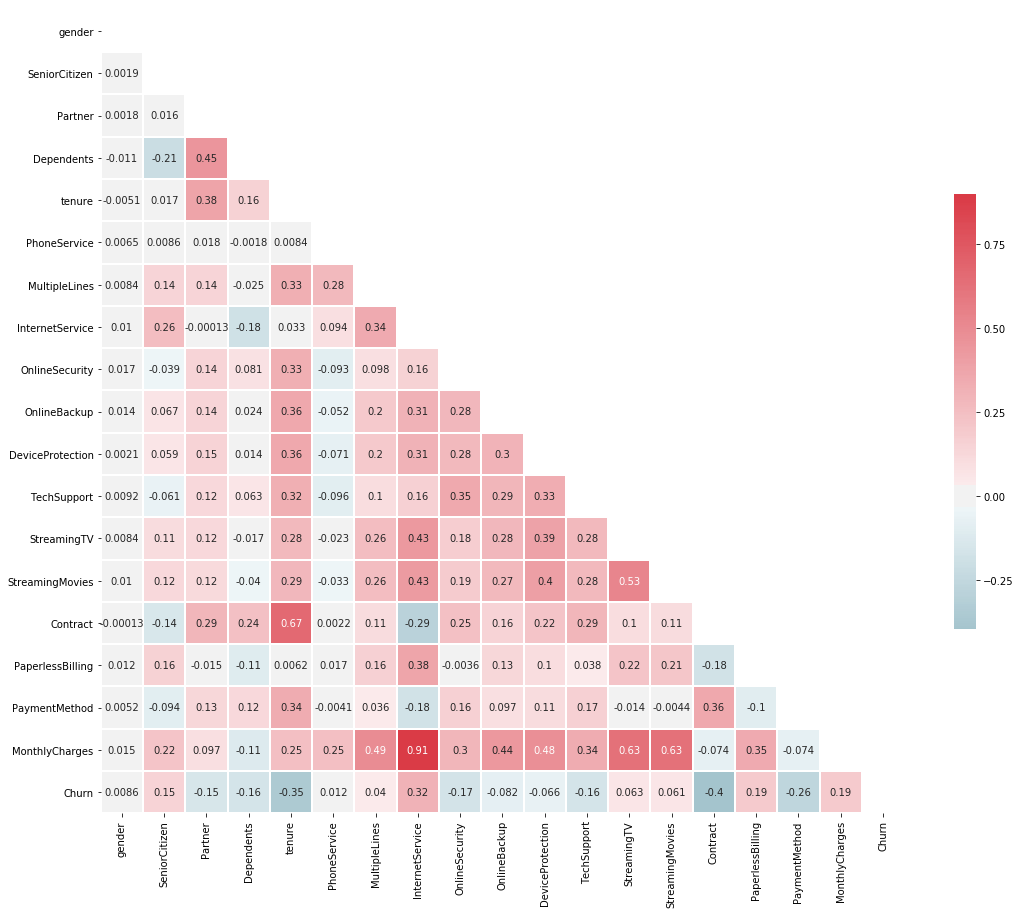

In [134]:
# Compute the correlation matrix
corr = data2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=1, annot = True, cbar_kws={"shrink": .5})

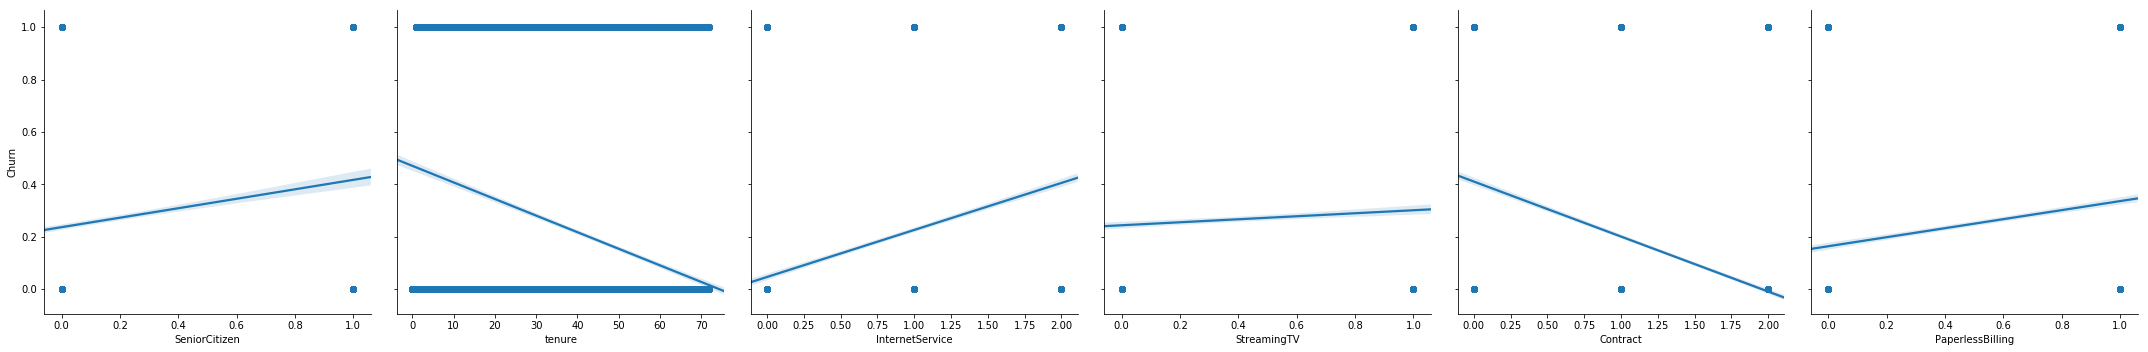

In [135]:
# create variable for selected columns.
featured_cols = ['SeniorCitizen','tenure', 'InternetService', 'StreamingTV', 'Contract', 'PaperlessBilling']

# multiple scatter plots in Seaborn
sns.pairplot(data2,  x_vars=featured_cols, y_vars="Churn", kind='reg',height=5)

### What are the factors that predict user churn?

* SeniorCitizen
* tenure
* InternetService
* StreamingTV
* Contract
* PaperlessBilling

### Accuracy of your model on the training set and on the test set.

The main difference between regression and classification is that the output variable in regression is numerical (or continuous) while that for classification is categorical (or discrete). For this reason we shall choose the classification model.

* Lets create and fit our model on the training data set.

Building Decision Tree Model
* Let's create a Decision Tree Model using Scikit-learn.

In [136]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import graphviz 
from sklearn.tree import export_graphviz 

In [137]:
# create the Churn_model object with a random state of 7 using decisionTreeClassifier.
Churn_model = DecisionTreeClassifier(max_leaf_nodes=300, max_depth=5, random_state=7)

In [138]:
# fit the Churn_model to the training data.
Churn_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=300,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [139]:
# making predictions based on the testing unit
y_predict = Churn_model.predict(X_test)

#### Evaluating our Model 

* Lets find out how accurate our model is.

In [140]:
# Model Accuracy, how often is the classifier correct?
print("The accuracy of our Decision Tree Classifier model is:",metrics.accuracy_score(y_test, y_predict)*100,"%")

The accuracy of our Decision Tree Classifier model is: 79.27117841930904 %


* Now we can calculate the mean squared error of our model and compare it to the accuracy.

In [141]:
print("The mean squared error in our model is:",mean_squared_error(y_test, y_predict)*100,"%")

The mean squared error in our model is: 20.728821580690962 %


In [142]:
print("The root mean squared error in our model is:",np.sqrt(mean_squared_error(y_test, y_predict))*100,"%")

The root mean squared error in our model is: 45.52891562588655 %


### Confusion Matrix. 

A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made."https://www.geeksforgeeks.org/confusion-matrix-machine-learning/"

In [143]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [144]:
actual = y_test
predicted = y_predict 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted)) 

Confusion Matrix :
[[1310  215]
 [ 223  365]]
Accuracy Score : 0.7927117841930904
Report : 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1525
           1       0.63      0.62      0.62       588

    accuracy                           0.79      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.79      0.79      0.79      2113



* Plot the confusion Matrix for Churn data vs Churn predictions using the confusion matrix contain data from the decision trees model.

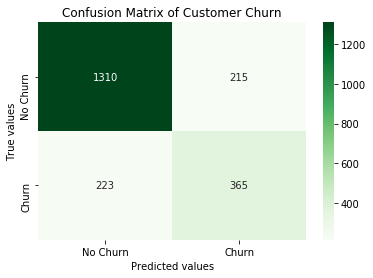

In [145]:
ax= plt.subplot()
#annot=True to annotate cells, #pass fmt='g' call to keep numbers from going to scientific notation.
sns.heatmap(results, annot=True, ax = ax, fmt='g', cmap='Greens'); #annot=True to annotate cells, #pass fmt='g' call to keep numbers from going to scientific notation.

# labels, title and ticks
ax.set_xlabel('Predicted values');ax.set_ylabel('True values'); 
ax.set_title('Confusion Matrix of Customer Churn'); 
ax.xaxis.set_ticklabels(['No Churn', 'Churn']); ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

### Logistic Regression. 

In [146]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with the training data
logreg.fit(X_train,y_train)
# create y_predict_lr 
y_predict_lr = logreg.predict(X_test)

In [147]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict_lr)
confusion_matrix

array([[1372,  153],
       [ 273,  315]])

* Plot the confusion Matrix for Churn data vs Churn predictions using the confusion matrix contain data from the Logistic regression model model.

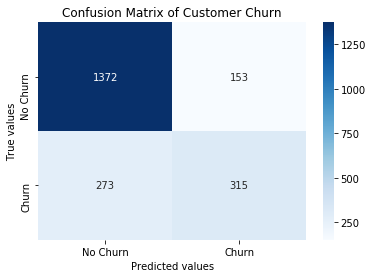

In [148]:
ax= plt.subplot()
#annot=True to annotate cells, #pass fmt='g' call to keep numbers from going to scientific notation.
sns.heatmap(confusion_matrix, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells, #pass fmt='g' call to keep numbers from going to scientific notation.

# labels, title and ticks
ax.set_xlabel('Predicted values');ax.set_ylabel('True values'); 
ax.set_title('Confusion Matrix of Customer Churn'); 
ax.xaxis.set_ticklabels(['No Churn', 'Churn']); ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

### Model Comparison. 

Now we can compare the Decision Tree model and the Logistic Regression model to see which model gives us better accuracy between the two.

In [149]:
# Set seed for reproducibility
SEED=7

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# # Instantiate knn
# knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('Decision Tree', dt)]

Logistic Regression : 79.839 % Accurate
Decision Tree : 78.751 % Accurate


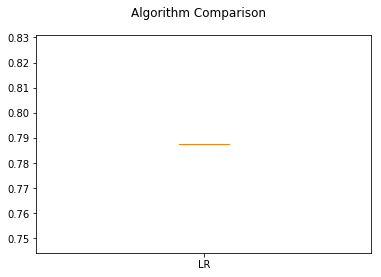

In [155]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy*100),"%", "Accurate")
    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(accuracy)
ax.set_xticklabels(names)
plt.show()

* As we can see, the output for both models is almost similar, with logistic regression being slightly better but only by around 1%. 

### Create a Decision tree image. 

In [156]:
from sklearn import tree
dot_data = tree.export_graphviz(Churn_model, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### What is the churn prevalence? How might prevalence affect the positive and negative predictive values of a test/model? 

Sensitivity and specificity are statistical measures of the performance of a binary classification test, also known in statistics as a classification function, that are widely used in medicine:

Sensitivity (also called the true positive rate, the recall, or probability of detection[1] in some fields) measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).
Specificity (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition). ("https://en.wikipedia.org/wiki/Sensitivity_and_specificity")

In [152]:
from sklearn import tree
import graphviz 
 
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 5)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X = X_train, y = y_train)
decisionTree = decisionTree.fit(X = X_train, y = y_train)
 
# Generate PDF visual of decision tree
churn_Tree = tree.export_graphviz(decisionTree, out_file=None, feature_names = list(X_train.columns.values), class_names = ["Didn't churn", "Churned"], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(churn_Tree)
graph.render('decision_tree.gv', view=True)

'decision_tree.gv.pdf'